# Find out optimal number of clusters 

In this notebook, we're going to go through an example machine learning (Unsupervised Learning) project with the goal of predict the optimal number of clusters and visualize that.

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for find out the optimal number of clusters.

## 1. Problem Defination
 In this project we are using K-Means clustering algorithm. K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. K-Means clustering comes under the Partitioning Methods.
 
 

## 2. Elblow method
For find out the appropriate number of clusters, we are usind elblow method.

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within-cluster sum of square (wss).
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

## 3.Data Set

We will work on Iris dataset.
we downloded the iris data from "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view" and stored it at local drive path "../Iris.csv/".

In [1]:
# Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the data and store into df variables
df = pd.read_csv("Iris.csv")

In [35]:
# look out top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Information about Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Find out optimal number of clusters
For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.

In [6]:
# Import KMeans cluster
from sklearn.cluster import KMeans

In [50]:
#Drop the species column
X = df.drop("Species", axis=1).values


In [51]:
Sum_of_squared_distances = []                    # Empty dictionary
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)                               # training the model
    Sum_of_squared_distances.append(km.inertia_) # Fill into dict.

Text(0.5, 1.0, 'Elbow Method For Optimal k')

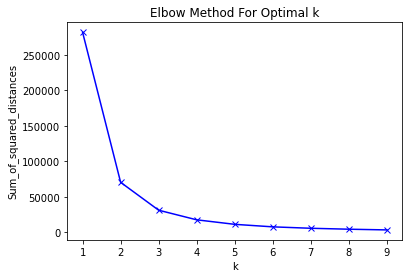

In [52]:
# Plot the Elbow method
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

I the above plot, It shown that, before k=3 sum_of_squared_distance gradually decreasing. After that it's almost constant.That's why k=3 is the optimal number of custers of this Dataset.

In [53]:
#Train the metod when k=3
km = KMeans(n_clusters = 3, init='k-means++', max_iter=300, n_init=10, random_state=None)

y = km.fit_predict(X)

In [54]:
km.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

In [55]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

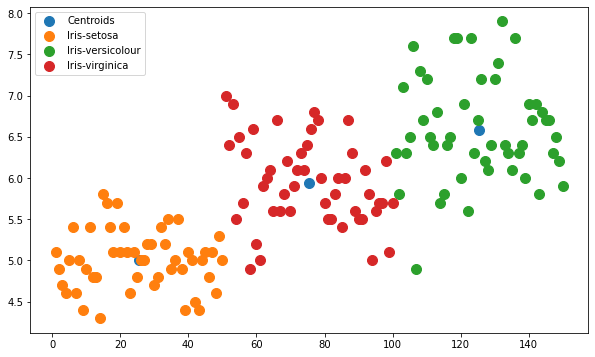

In [58]:
fig, ax = plt.subplots(figsize=(10,6))
# Plotting the centroids of the clusters
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, cmap = 'rainbow', label = 'Centroids')
# Visualising the clusters 
ax.scatter(X[y == 0, 0], X[y == 0, 1], 
            s = 100, cmap = 'rainbow', label = 'Iris-setosa')
ax.scatter(X[y == 1, 0], X[y == 1, 1], 
            s = 100, cmap = 'rainbow', label = 'Iris-versicolour')
ax.scatter(X[y == 2, 0], X[y == 2, 1],
            s = 100, cmap = 'rainbow', label = 'Iris-virginica')


ax.legend()